In [1]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [2]:
# load dataset
dataframe = read_csv('horse-colic.csv', header=0, na_values='?')

In [3]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [4]:
# evaluate each strategiy on the dataset
results = list()
startegies = ['mean', 'median', 'most_frequent', 'constant']
for s in startegies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>mean 0.870 (0.051)
>median 0.869 (0.061)
>most_frequent 0.863 (0.055)
>constant 0.877 (0.051)


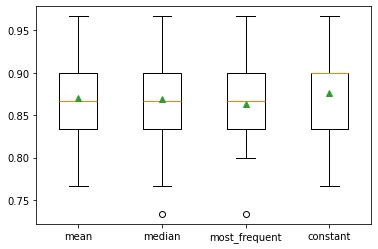

In [5]:
 # plot model performnace for comparison
pyplot.boxplot(results, labels=startegies, showmeans=True)
pyplot.show()